In [13]:
# setup python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from cvxpy import *

In [14]:
# plot properties
# use to create figure for tex
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

In [15]:
# create a polynomial from roots
p = np.poly1d([1,-6,11,-6])

In [16]:
# generate some data
n_points = 20
np.random.seed(0)
x = np.linspace(.5,3.5,n_points)
y = p(x) + .4*np.random.randn(n_points)
y_true = p(x)

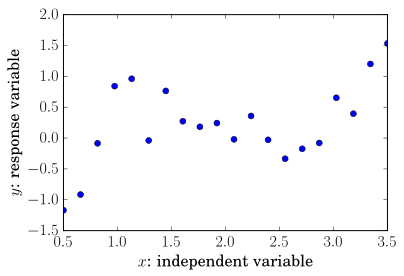

In [22]:
plt.figure()
plt.plot(x,y,'o')
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)
plt.savefig('fig/poly-fit-1.pdf')

In [18]:
def cvxpy_poly_fit(x,y,degree):
    # construct data matrix
    A = np.vander(x,degree+1)
    b = y
    p_cvx = Variable(degree+1)
    # set up optimization problem
    objective = Minimize(sum_squares(A*p_cvx - b))
    constraints = []
    # solve the problem
    prob = Problem(objective,constraints)
    prob.solve()
    # return the polynomial coefficients
    return np.array(p_cvx.value)
    

In [19]:
c1 = cvxpy_poly_fit(x,y,1)
c2 = cvxpy_poly_fit(x,y,2)
c3 = cvxpy_poly_fit(x,y,3)

p1 = np.poly1d(c1.flatten())
p2 = np.poly1d(c2.flatten())
p3 = np.poly1d(c3.flatten())

In [24]:
# plot
y1 = p1(x)
y2 = p2(x)
y3 = p3(x)

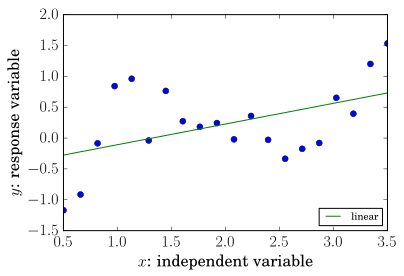

In [25]:
# plot linear fit
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y1,label='linear')
plt.legend(loc=4,fontsize=10)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)
plt.savefig('fig/poly-fit-2.pdf')

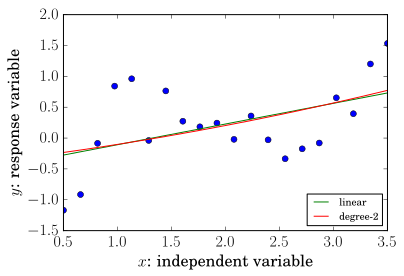

In [26]:
# plot quadratic fit
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y1,label='linear')
plt.plot(x,y2,label='degree-2')
plt.legend(loc=4,fontsize=10)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)
plt.savefig('fig/poly-fit-3.pdf')

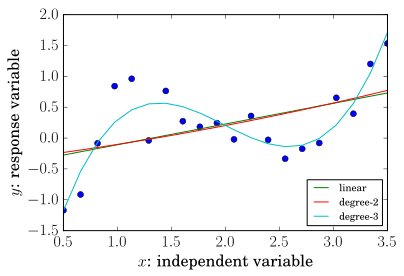

In [27]:
# plot cubic fit
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y1,label='linear')
plt.plot(x,y2,label='degree-2')
plt.plot(x,y3,label='degree-3')
plt.legend(loc=4,fontsize=10)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)
plt.savefig('fig/poly-fit-4.pdf')

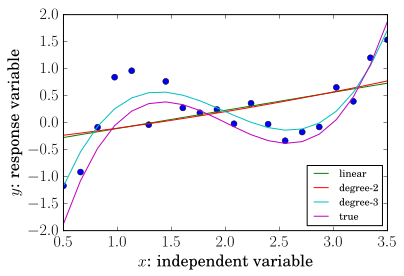

In [28]:
# plot all
plt.figure()
plt.plot(x,y,'o')
plt.plot(x,y1,label='linear')
plt.plot(x,y2,label='degree-2')
plt.plot(x,y3,label='degree-3')
plt.plot(x,y_true,label='true')
plt.legend(loc=4,fontsize=10)
plt.xlabel('$x$: independent variable')
plt.ylabel('$y$: response variable')
plt.gcf().subplots_adjust(bottom=0.15,left=0.15)
plt.savefig('fig/poly-fit-5.pdf')